In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load and preview data
data = pd.read_csv('C:/Users/festu/OneDrive/Desktop/Job app/Data3.csv')

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   median_spend                         537 non-null    float64
 1   lat                                  537 non-null    float64
 2   long                                 537 non-null    float64
 3   accessibility_to_cities_2015         537 non-null    float64
 4   chirps_2015                          537 non-null    float64
 5   chirps_average_2002_2015             537 non-null    float64
 6   distance_to_ports_2012               537 non-null    float64
 7   distance_to_powerplants_2016         537 non-null    float64
 8   distance_to_roads_2015               537 non-null    float64
 9   distance_to_transmission_lines_2016  537 non-null    float64
 10  landscan_population_2017             537 non-null    float64
 11  modis_evi_2000_2016             

In [6]:
# Identify missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 median_spend                           458
lat                                    458
long                                   458
accessibility_to_cities_2015           458
chirps_2015                            458
chirps_average_2002_2015               458
distance_to_ports_2012                 458
distance_to_powerplants_2016           458
distance_to_roads_2015                 458
distance_to_transmission_lines_2016    458
landscan_population_2017               458
modis_evi_2000_2016                    458
modis_lst_day_average_2015             458
modis_lst_night_average_2015           458
modis_ndvi_2000_2016                   458
sedac_gpw_2015                         458
srtm_2000                              458
viirs_nightlights_2015                 458
dtype: int64


In [11]:
print(data.describe())

       median_spend         lat        long  accessibility_to_cities_2015  \
count  5.370000e+02  537.000000  537.000000                    537.000000   
mean   1.201307e+05    8.099393    7.047926                      1.867425   
std    1.181176e+05    2.414043    2.406572                      1.905301   
min    1.393600e+04    4.398427    2.879477                      0.100000   
25%    5.382500e+04    6.321970    5.041212                      0.600000   
50%    9.107667e+04    7.496003    7.071525                      1.469755   
75%    1.414430e+05    9.764297    8.447937                      2.528656   
max    1.092064e+06   13.714247   13.630725                     19.603346   

       chirps_2015  chirps_average_2002_2015  distance_to_ports_2012  \
count   537.000000                537.000000              537.000000   
mean      3.689488               1532.595821               12.912725   
std       1.381944                647.459708                8.192952   
min       1.087242

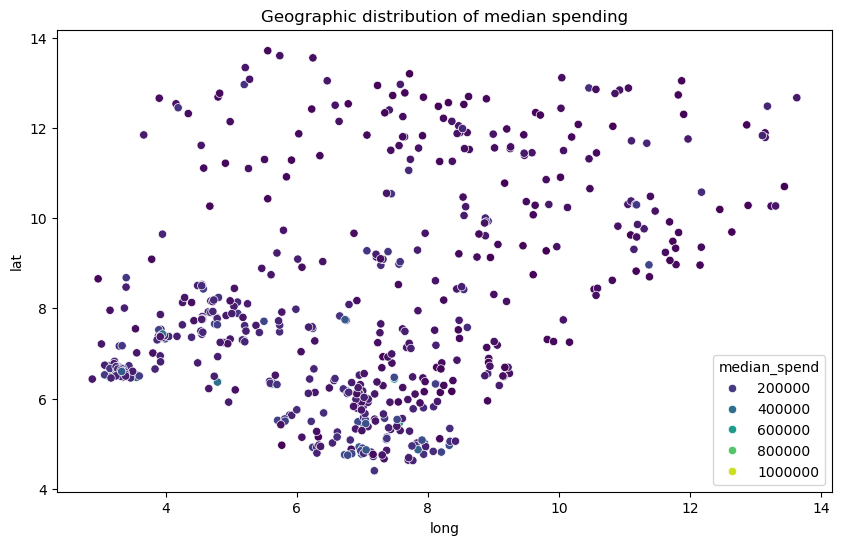

In [13]:
# Visualize spatial data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', hue='median_spend', data=data, palette='viridis')
plt.title('Geographic distribution of median spending')
plt.show()

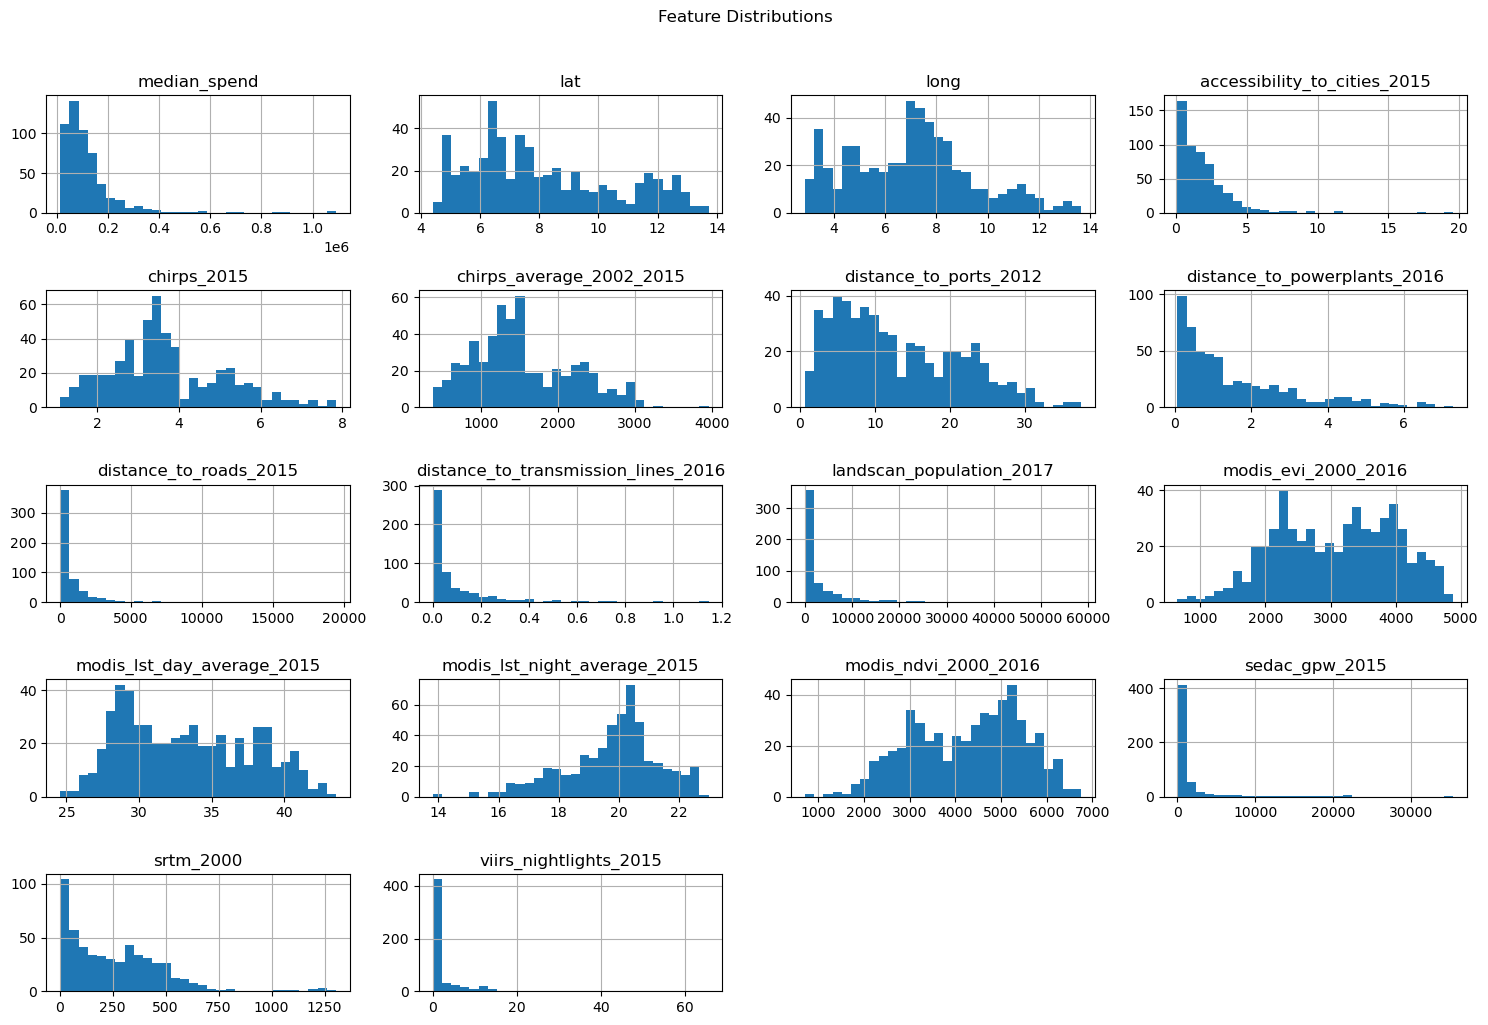

In [15]:
# Plot histograms for each predictor
data.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions", y=1.02)
plt.tight_layout()
plt.show()


In [17]:
# Calculate skewness for each column
skew_values = data.skew()
print("Skewness per feature:\n", skew_values)


Skewness per feature:
 median_spend                           4.169477
lat                                    0.587137
long                                   0.353622
accessibility_to_cities_2015           3.688922
chirps_2015                            0.585142
chirps_average_2002_2015               0.558062
distance_to_ports_2012                 0.594587
distance_to_powerplants_2016           1.386403
distance_to_roads_2015                 7.200446
distance_to_transmission_lines_2016    3.212395
landscan_population_2017               4.291400
modis_evi_2000_2016                   -0.121253
modis_lst_day_average_2015             0.302873
modis_lst_night_average_2015          -0.649167
modis_ndvi_2000_2016                  -0.255332
sedac_gpw_2015                         4.802889
srtm_2000                              1.392924
viirs_nightlights_2015                 5.876710
dtype: float64


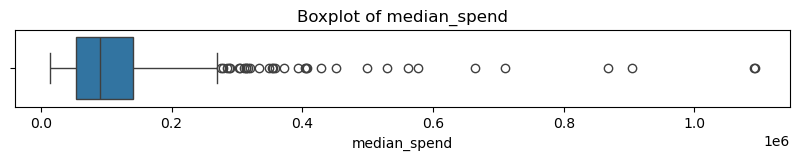

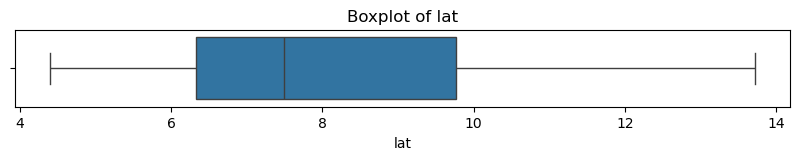

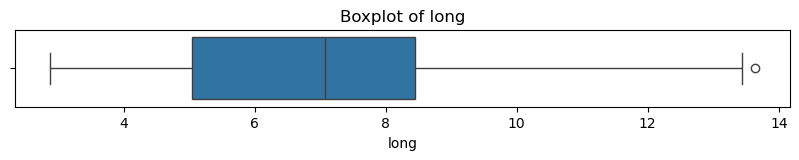

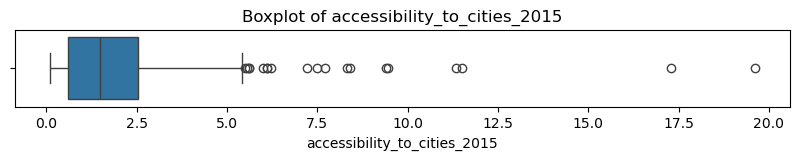

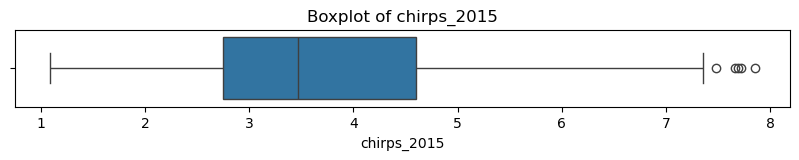

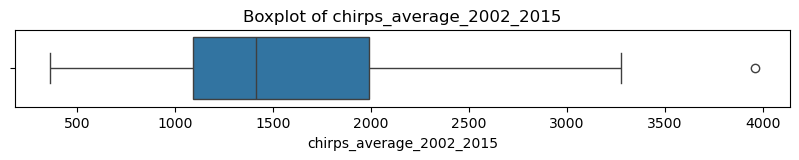

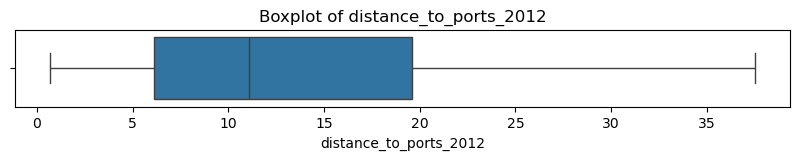

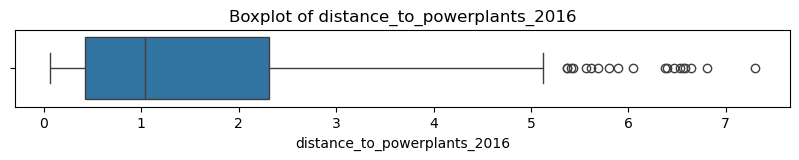

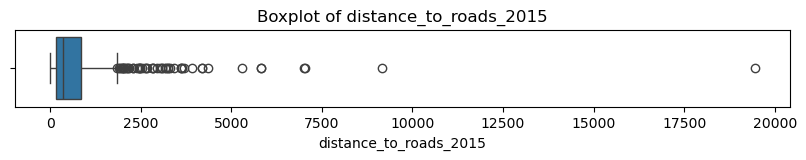

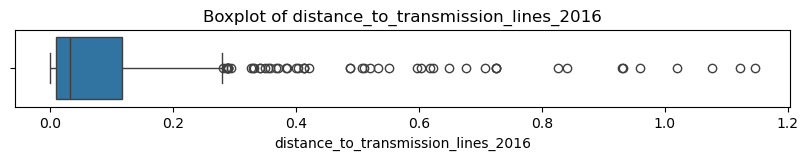

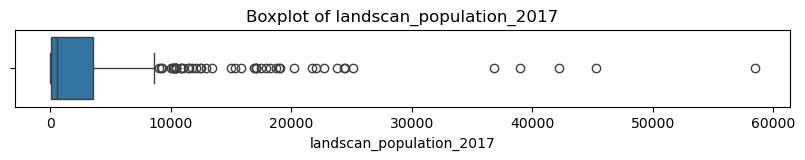

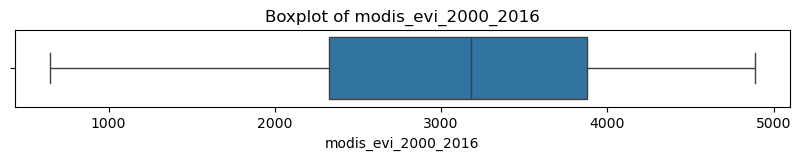

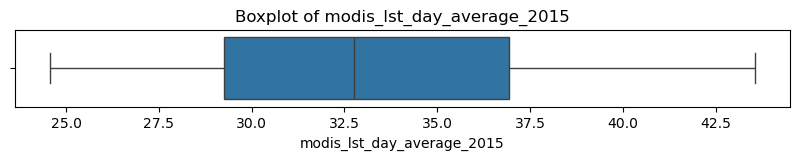

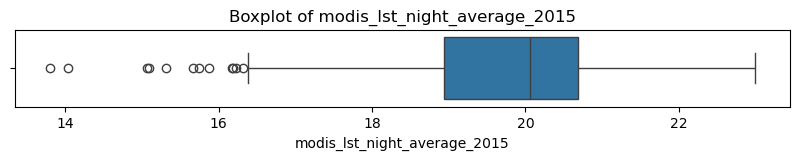

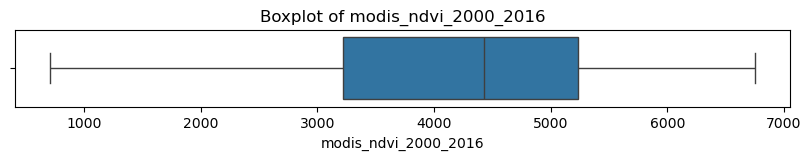

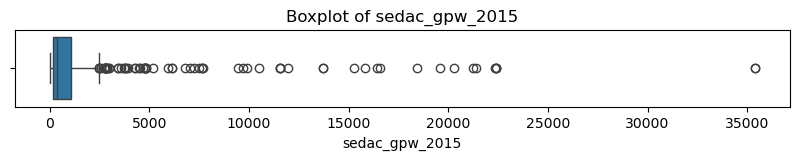

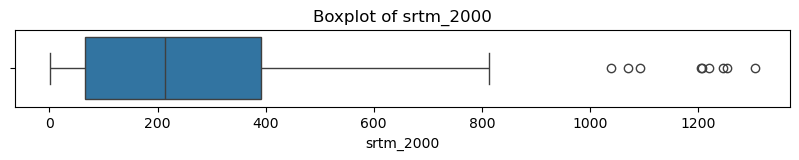

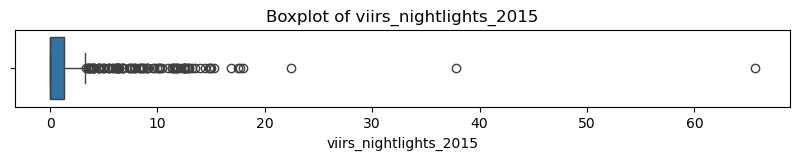

In [19]:
# Boxplot to visually inspect for outliers
for column in data.columns:
    plt.figure(figsize=(10, 1))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


In [23]:
# Log-transform skewed features
skewed_features = skew_values[abs(skew_values) > 1].index  # Select highly skewed columns
data[skewed_features] = data[skewed_features].apply(lambda x: np.log1p(x))

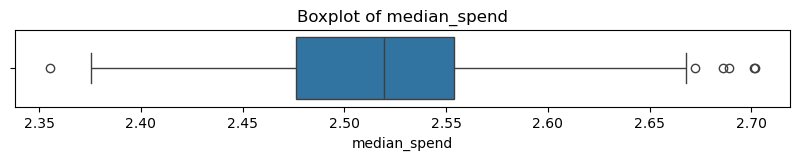

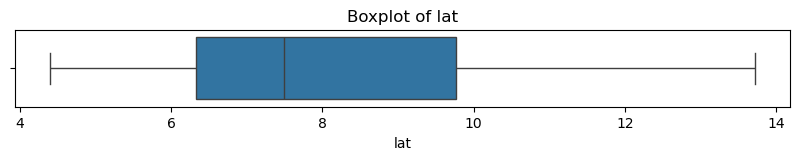

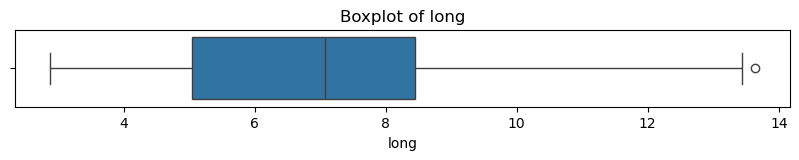

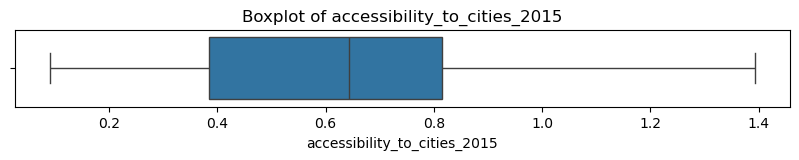

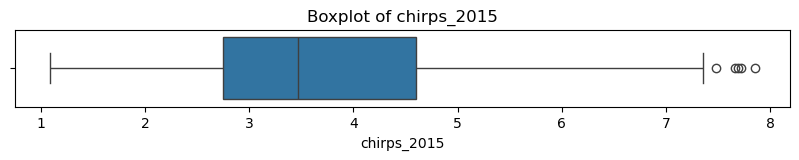

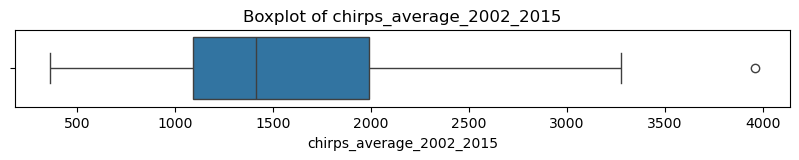

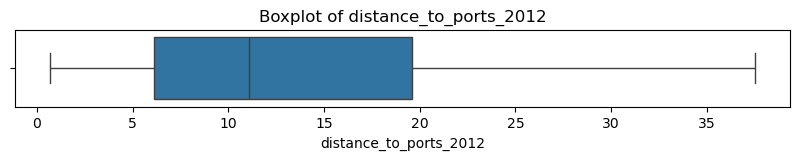

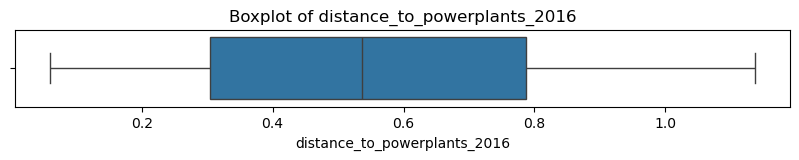

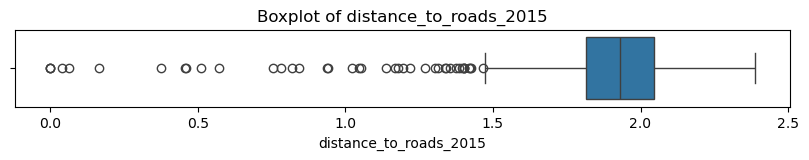

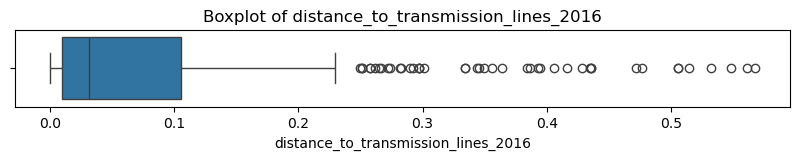

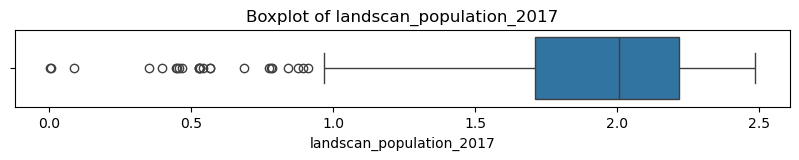

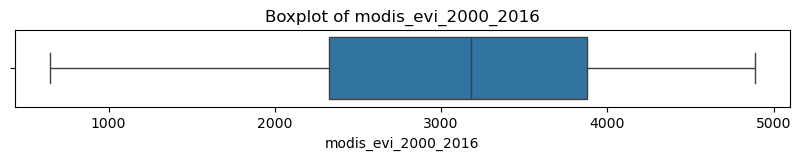

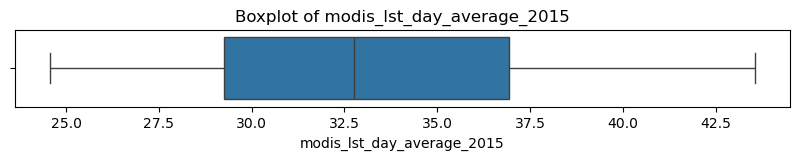

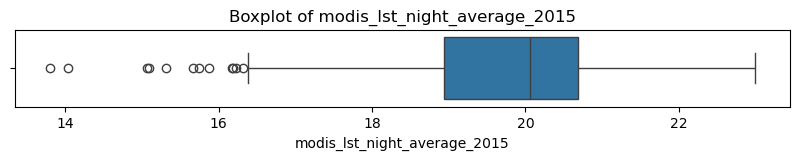

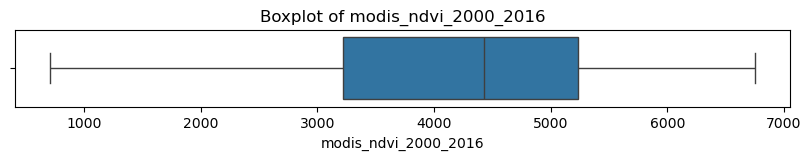

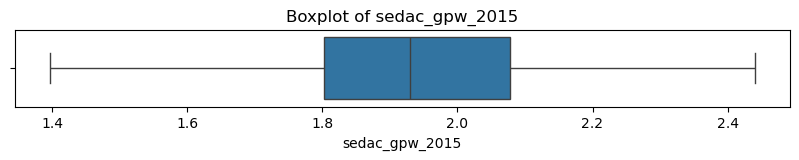

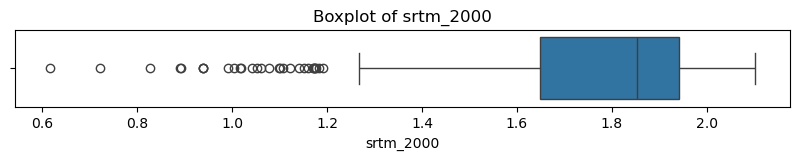

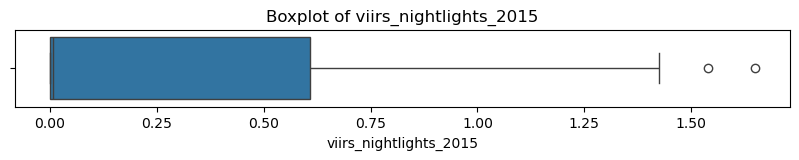

In [25]:
# Boxplot to visually inspect for outliers after transformation
for column in data.columns:
    plt.figure(figsize=(10, 1))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [27]:
# Feature Engineering: Drop missing values
data.dropna(inplace=True)
features = data.drop(columns=['median_spend', 'lat', 'long'])
target = data['median_spend']


In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [31]:
# Baseline Model: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_r2 = r2_score(y_test, lr_preds)

In [33]:
# Complex Model: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

In [34]:
# Display results
print(f"Linear Regression RMSE: {lr_rmse}, R2: {lr_r2}")
print(f"Random Forest RMSE: {rf_rmse}, R2: {rf_r2}")


Linear Regression RMSE: 0.04096773444404854, R2: 0.568832265637657
Random Forest RMSE: 0.04021811702925095, R2: 0.5844667072743573


# Interpretation
# Random Forest has a lower RMSE and higher R-squared, indicating better performance for spatial data complexities.

The Random Forest model outperformed linear regression, with a lower RMSE and higher R-squared, suggesting it better captures the complex relationships among predictors influencing median_spend. The RMSE value provides insight into the average error in currency units, reflecting a tangible estimate of predictive accuracy. A higher R-squared indicates that the model explains more variance, suggesting that location-based and other raster-based features are informative for predicting household spending within Nigerian clusters. Future work could explore spatial autocorrelation to further enhance predictive accuracy.